In [1]:
# This code is to analysise the male and female comparison in top 5 countries with hight suicide rates
# catplot (for categorical data) from Seaborn library is used for visualisation 

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:

# Getting Data of crude suicide rate
suicide_rate_data_filepath = os.path.join("..","processed_data", "crude_suicide_rates.csv")
suicide_rate_dataframe = pd.read_csv(suicide_rate_data_filepath, index_col=0)
#print(human_resource_dataframe.head())

# Calculate the total suicide rate of all different ages
suicide_rate_dataframe['all_age'] = suicide_rate_dataframe['80_above']+ suicide_rate_dataframe['70to79'] + suicide_rate_dataframe['60to69']+ suicide_rate_dataframe['50to59']
+ suicide_rate_dataframe['40to49']+ suicide_rate_dataframe['30to39']+ suicide_rate_dataframe['20to29'] + suicide_rate_dataframe['10to19']
print(suicide_rate_dataframe.head())

       Country         Sex  80_above  70to79  60to69  50to59  40to49  30to39  \
0  Afghanistan  Both sexes      42.0    11.0     5.5     5.6     6.6     9.2   
1  Afghanistan        Male      70.4    20.9     9.8     9.3    10.5    15.1   
2  Afghanistan      Female      20.1     2.3     1.4     1.6     2.3     2.7   
3      Albania  Both sexes      16.3     8.3     6.0     7.8     9.1     6.1   
4      Albania        Male      23.2    11.9     8.1    11.4    13.5     8.8   

   20to29  10to19  all_age  
0    10.2     3.1     64.1  
1    16.3     4.8    110.4  
2     3.5     1.2     25.4  
3     6.5     5.0     38.4  
4     6.3     3.1     54.6  


In [12]:
# Do Melting - Tranform/Combine the multiple  column names of different age groups into one column "Age"
suicide_rate_pivot_longer_df = pd.melt(suicide_rate_dataframe, id_vars=['Country', 'Sex'], value_vars=['80_above','70to79', '40to49', '30to39', '20to29', '10to19', 'all_age'], var_name='Age',value_name='Suicide_rate')
#print(suicide_rate_pivot_longer_df)

# Find Top 5 countries of highest suicide rate in 'all_age' and "both sexes"
# And Male/ Female - Age distribution 
top_5_suicide_rate_bothsex = suicide_rate_pivot_longer_df[(suicide_rate_pivot_longer_df['Sex'] == 'Both sexes' ) & (suicide_rate_pivot_longer_df['Age'] == 'all_age' )].nlargest(5, 'Suicide_rate')
suicide_rate_separatesex = suicide_rate_pivot_longer_df[suicide_rate_pivot_longer_df['Sex'] != 'Both sexes']

['Lesotho', 'Zimbabwe', 'Uganda', "Côte d'Ivoire", 'Nigeria']


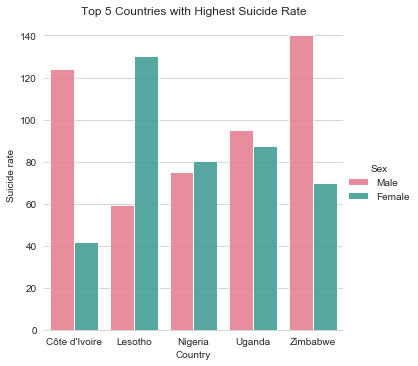

In [14]:
## Get the countries names of top 5 highest suicide rate
print(top_10_suicide_rate_bothsex['Country'].to_list())
top_10_country_names = top_5_suicide_rate_bothsex['Country'].to_list()
## Filtering out Male/Female records belongs to the hightest country.
final = suicide_rate_separatesex[suicide_rate_separatesex['Country'].isin(top_10_country_names)]
#print("final",final.head())

### Plotting 
sns.set_style("whitegrid")
gg = sns.catplot(data = final, kind="bar", x="Country", y="Suicide_rate",hue="Sex", palette="husl", alpha=.9, height=5, ci=None)
gg.despine(left=True).set_ylabels("Suicide rate")
plt.title("Top 5 Countries with Highest Suicide Rate")
plt.show()